In [1]:
### Project Main Code File
### ICMF 324 - Mahidol University International College
### Logan Harris, [Everyone Enter Their Name Here]
### Analysis of University Ranking/Regression

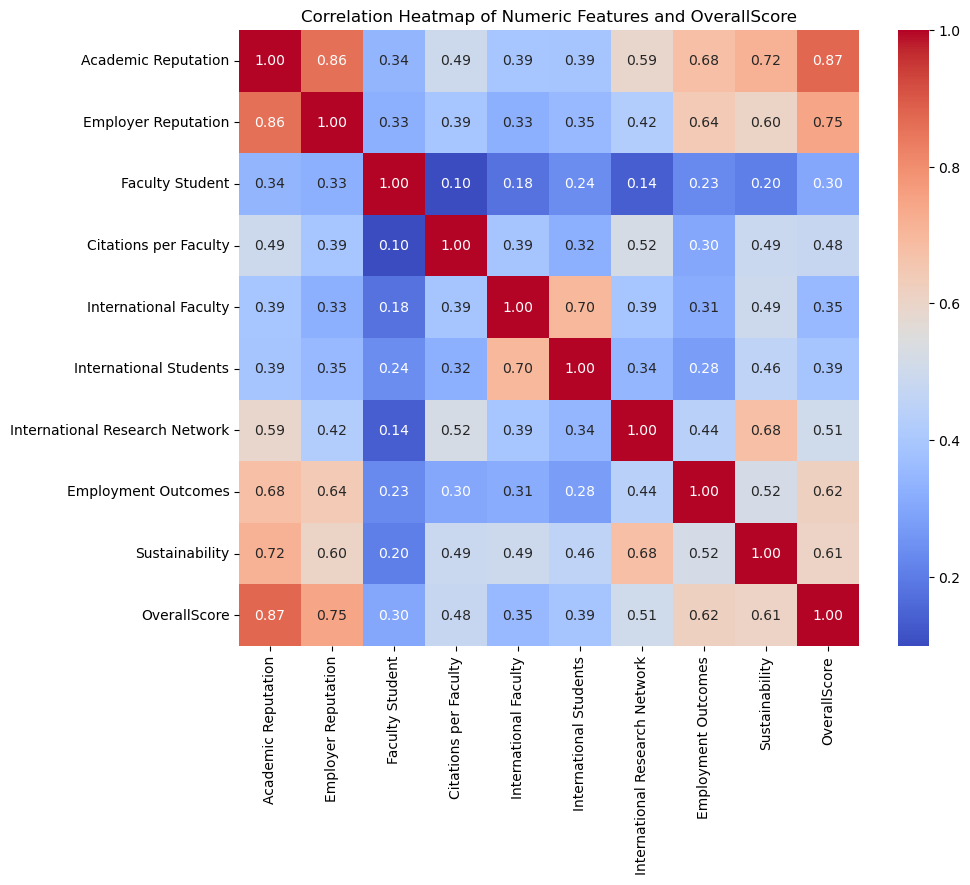

                                Academic Reputation  Employer Reputation  \
Academic Reputation                        1.000000             0.857360   
Employer Reputation                        0.857360             1.000000   
Faculty Student                            0.341489             0.326207   
Citations per Faculty                      0.493846             0.391922   
International Faculty                      0.391714             0.326924   
International Students                     0.387850             0.354035   
International Research Network             0.588892             0.420085   
Employment Outcomes                        0.678520             0.643687   
Sustainability                             0.716739             0.604785   
OverallScore                               0.873512             0.748524   

                                Faculty Student  Citations per Faculty  \
Academic Reputation                    0.341489               0.493846   
Employer Reputa

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

df = pd.read_csv('qs-world-rankings-2025.csv', encoding='UTF-8-SIG')
df.columns = [col.strip() for col in df.columns]

### Convert overall score metric to numeric and add error handling

df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')

### Create log[qs_overall_score], with error handling for log(0)

df['OverallScore'] = np.log(df['QS Overall Score'] + 1e-6)

### all of our features (will minimize later)
features = ['2025 Rank', '2024 Rank', 'Institution Name', 'Location', 'Location Full', 'Size', 
            'Academic Reputation', 'Employer Reputation', 'Faculty Student', 'Citations per Faculty', 
            'International Faculty', 'International Students', 'International Research Network', 
            'Employment Outcomes', 'Sustainability']

### correlation matrix, numeric features only
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
numeric_features.append('OverallScore')

### corr matrix
corr_matrix = df[numeric_features].corr()

### heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features and OverallScore')
plt.show()

### Print correlation matrix
print(corr_matrix)


In [ ]:
### INITIAL OBSERVATIONS: As expected, academic reputation is the highest driver of overall score, followed by employer reputation.
### I wonder if there is anyway that we can see if there are any outliers from these correlations and see if we can identify if there are any overrated
### or underated universities, according to their rankings, driven by other factors? Half-baked idea, I don't know.